# Imports

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing import image
import pandas as pd
import numpy as np
import cv2
import imageio
from PIL import Image
from sklearn.utils import class_weight
import numpy as np
from keras import layers, Input, utils
from keras.models import Model

# Global variables


In [ ]:
BATCH_SIZE = 128
EPOCHS = 30
VALIDATION_SPLIT = 0.3
directory = ""
img_dim = (128,128)


#Creating train and val set

In [ ]:
image_generator = image.ImageDataGenerator(rescale = 1. /255, validation_split = VALIDATION_SPLIT, preprocessing_function = None )
train_data = image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory = directory, 
                                                 subset = "training", 
                                                 shuffle = True, 
                                                 target_size = (128,128), 
                                                 class_mode = "categorical")
validation_data = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                      directory = directory,
                                                      subset = "validation",
                                                      shuffle = True,
                                                      target_size = (128,128),
                                                      class_mode = "categorical")
tot_train = len(train_data.classes)
tot_val = len(validation_data.classes)

print(train_data.classes)

##Classes weights

In [ ]:
class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_data.classes), 
            train_data.classes)
weight = {i : class_weights[i] for i in range(3)}
print(weight)

#Model

In [ ]:
# taken from https://iq.opengenus.org/vgg19-architecture/
from keras import backend as K
#K.set_image_data_format('th')

tot_train = TOT_DATA*(1-VALIDATION_SPLIT)
tot_val = TOT_DATA*VALIDATION_SPLIT

model = models.Sequential([
                           layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),         

                           layers.Conv2D(256, (3, 3), activation='relu'),
                           #layers.Conv2D(256, (3, 3), activation='relu'),
                           #layers.Conv2D(256, (3, 3), activation='relu'),
                           layers.Conv2D(256, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(512, (3, 3), activation='relu'),
                           #layers.Conv2D(512, (3, 3), activation='relu'),
                           #layers.Conv2D(521, (3, 3), activation='relu'),
                           layers.Conv2D(512, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           
                           layers.Flatten(),
                           layers.Dense(4096, activation='relu'),
                           layers.Dropout(0.4),
                           layers.Dense(4096, activation='relu'),
                           layers.Dropout(0.4),
                           layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(train_data, 
                    epochs=EPOCHS, 
                    class_weight=weight,
                    steps_per_epoch=int(np.ceil(tot_train / BATCH_SIZE)), 
                    validation_data=validation_data, 
                    validation_steps=int(np.ceil(tot_val / float(BATCH_SIZE)))) #10 epochs instead of 20


In [ ]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_accuracy'])  
plt.plot(history.history['val_loss']) 
plt.hlines(1, 0, EPOCHS)
plt.axis([0,EPOCHS-1, 0, 3]) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['accuracy', 'loss','val_accuracy', 'val_loss'], loc='best') 

## Save Model


In [12]:
import os

save_path = ""

if not os.path.exists(save_path) :
  os.makedirs(save_path)

model.save(save_path)

INFO:tensorflow:Assets written to: ../light/vgg19\assets


# Orientation

In [13]:
directory = ""

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

In [20]:
image_generator = image.ImageDataGenerator(rescale = 1. /255, validation_split = VALIDATION_SPLIT, preprocessing_function = None )
train_data = image_generator.flow_from_directory(batch_size=BATCH_SIZE, 
                                                 directory = directory, 
                                                 subset = "training", 
                                                 shuffle = True, 
                                                 target_size = (128,128), 
                                                 class_mode = "categorical")
validation_data = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                      directory = directory,
                                                      subset = "validation",
                                                      shuffle = True,
                                                      target_size = (128,128),
                                                      class_mode = "categorical")
print(train_data.classes)

class_weights = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_data.classes), 
            train_data.classes)
weight = {i : class_weights[i] for i in range(3)}
print(weight)

Found 7841 images belonging to 3 classes.
Found 3358 images belonging to 3 classes.
[0 0 0 ... 2 2 2]
{0: 0.5796555038072004, 1: 1.522228693457581, 2: 1.6183694530443757}


In [21]:
model = models.Sequential([
                           layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.Conv2D(128, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),         

                           layers.Conv2D(256, (3, 3), activation='relu'),
                          #  layers.Conv2D(256, (3, 3), activation='relu'),
                          #  layers.Conv2D(256, (3, 3), activation='relu'),
                           layers.Conv2D(256, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),

                           layers.Conv2D(512, (3, 3), activation='relu'),
                          #  layers.Conv2D(512, (3, 3), activation='relu'),
                          #  layers.Conv2D(521, (3, 3), activation='relu'),
                           layers.Conv2D(521, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           
                           layers.Flatten(),
                           layers.Dense(4096, activation='relu'),
                           layers.Dropout(0.4),
                           layers.Dense(4096, activation='relu'),
                           layers.Dropout(0.4),
                           layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_data,
                    epochs=EPOCHS,
                    class_weight=weight,
                    callbacks=[callback],
                    steps_per_epoch=int(np.ceil(tot_train / BATCH_SIZE)), 
                    validation_data=validation_data,
                    validation_steps=int(np.ceil(tot_val / float(BATCH_SIZE)))) #10 epochs instead of 20


Epoch 1/30
62/62 [==============================] - 1362s 22s/step - loss: 1.1136 - accuracy: 0.3154 - val_loss: 1.1067 - val_accuracy: 0.2058
Epoch 2/30
62/62 [==============================] - 1370s 22s/step - loss: 1.0923 - accuracy: 0.3438 - val_loss: 1.0983 - val_accuracy: 0.2058
Epoch 3/30
62/62 [==============================] - 1351s 22s/step - loss: 1.0978 - accuracy: 0.3345 - val_loss: 1.0986 - val_accuracy: 0.2189
Epoch 4/30
62/62 [==============================] - 1351s 22s/step - loss: 1.0994 - accuracy: 0.3143 - val_loss: 1.0965 - val_accuracy: 0.5753
Epoch 5/30
62/62 [==============================] - 1353s 22s/step - loss: 1.0941 - accuracy: 0.4912 - val_loss: 1.1016 - val_accuracy: 0.2189
Epoch 6/30
62/62 [==============================] - 1351s 22s/step - loss: 1.0996 - accuracy: 0.2151 - val_loss: 1.0983 - val_accuracy: 0.2058
Epoch 7/30
62/62 [==============================] - 1354s 22s/step - loss: 1.0990 - accuracy: 0.2574 - val_loss: 1.1003 - val_accuracy: 0.2189

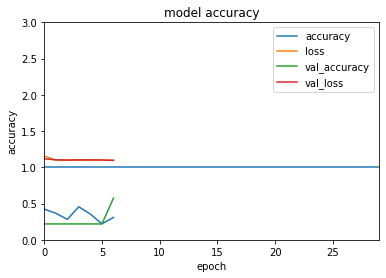

In [18]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_accuracy'])  
plt.plot(history.history['val_loss']) 
plt.hlines(1, 0, EPOCHS)
plt.axis([0,EPOCHS-1, 0, 3]) 
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['accuracy', 'loss','val_accuracy', 'val_loss'], loc='best')

In [24]:
import os

save_path = ""

if not os.path.exists(save_path) :
  os.makedirs(save_path)

model.save(save_path)

INFO:tensorflow:Assets written to: ../orientation/vgg19\assets
